In [194]:
import pandas as pd
import numpy as np
df=pd.read_csv("ToyotaCorolla_-_MLR[1].csv")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [220]:
#Checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   float64
 1   Age_08_04  1436 non-null   float64
 2   KM         1436 non-null   float64
 3   Fuel_Type  1436 non-null   int64  
 4   HP         1436 non-null   float64
 5   Automatic  1436 non-null   float64
 6   cc         1436 non-null   float64
 7   Doors      1436 non-null   float64
 8   Cylinders  1436 non-null   float64
 9   Gears      1436 non-null   float64
 10  Weight     1436 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 123.5 KB


In [221]:
df1=df.iloc[:,1:]
df1.describe()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1.436000e+03,1436.000000,1436.000000,1.436000e+03,1.436000e+03,1436.000000,1.436000e+03,1436.0,1.436000e+03,1436.000000
mean,-7.916911e-17,0.000000,1.868384,9.896138e-18,9.896138e-18,0.000000,3.958455e-17,0.0,-4.948069e-18,0.000000
std,1.000348e+00,1.000348,0.371572,1.000348e+00,1.000348e+00,1.000348,1.000348e+00,0.0,1.000348e+00,1.000348
min,-2.955175e+00,-1.827849,0.000000,-2.170298e+00,-2.428931e-01,-0.652594,-2.135178e+00,0.0,-1.075361e+01,-1.376963
25%,-6.425400e-01,-0.681007,2.000000,-7.680418e-01,-2.428931e-01,-0.416878,-1.085139e+00,0.0,-1.404252e-01,-0.616836
50%,2.717574e-01,-0.137191,2.000000,5.674405e-01,-2.428931e-01,0.054555,-3.509882e-02,0.0,-1.404252e-01,-0.046740
75%,7.557973e-01,0.493087,2.000000,5.674405e-01,-2.428931e-01,0.054555,1.014941e+00,0.0,-1.404252e-01,0.238307
max,1.293619e+00,4.653267,2.000000,6.042918e+00,4.117038e+00,33.997687,1.014941e+00,0.0,5.166169e+00,10.309989


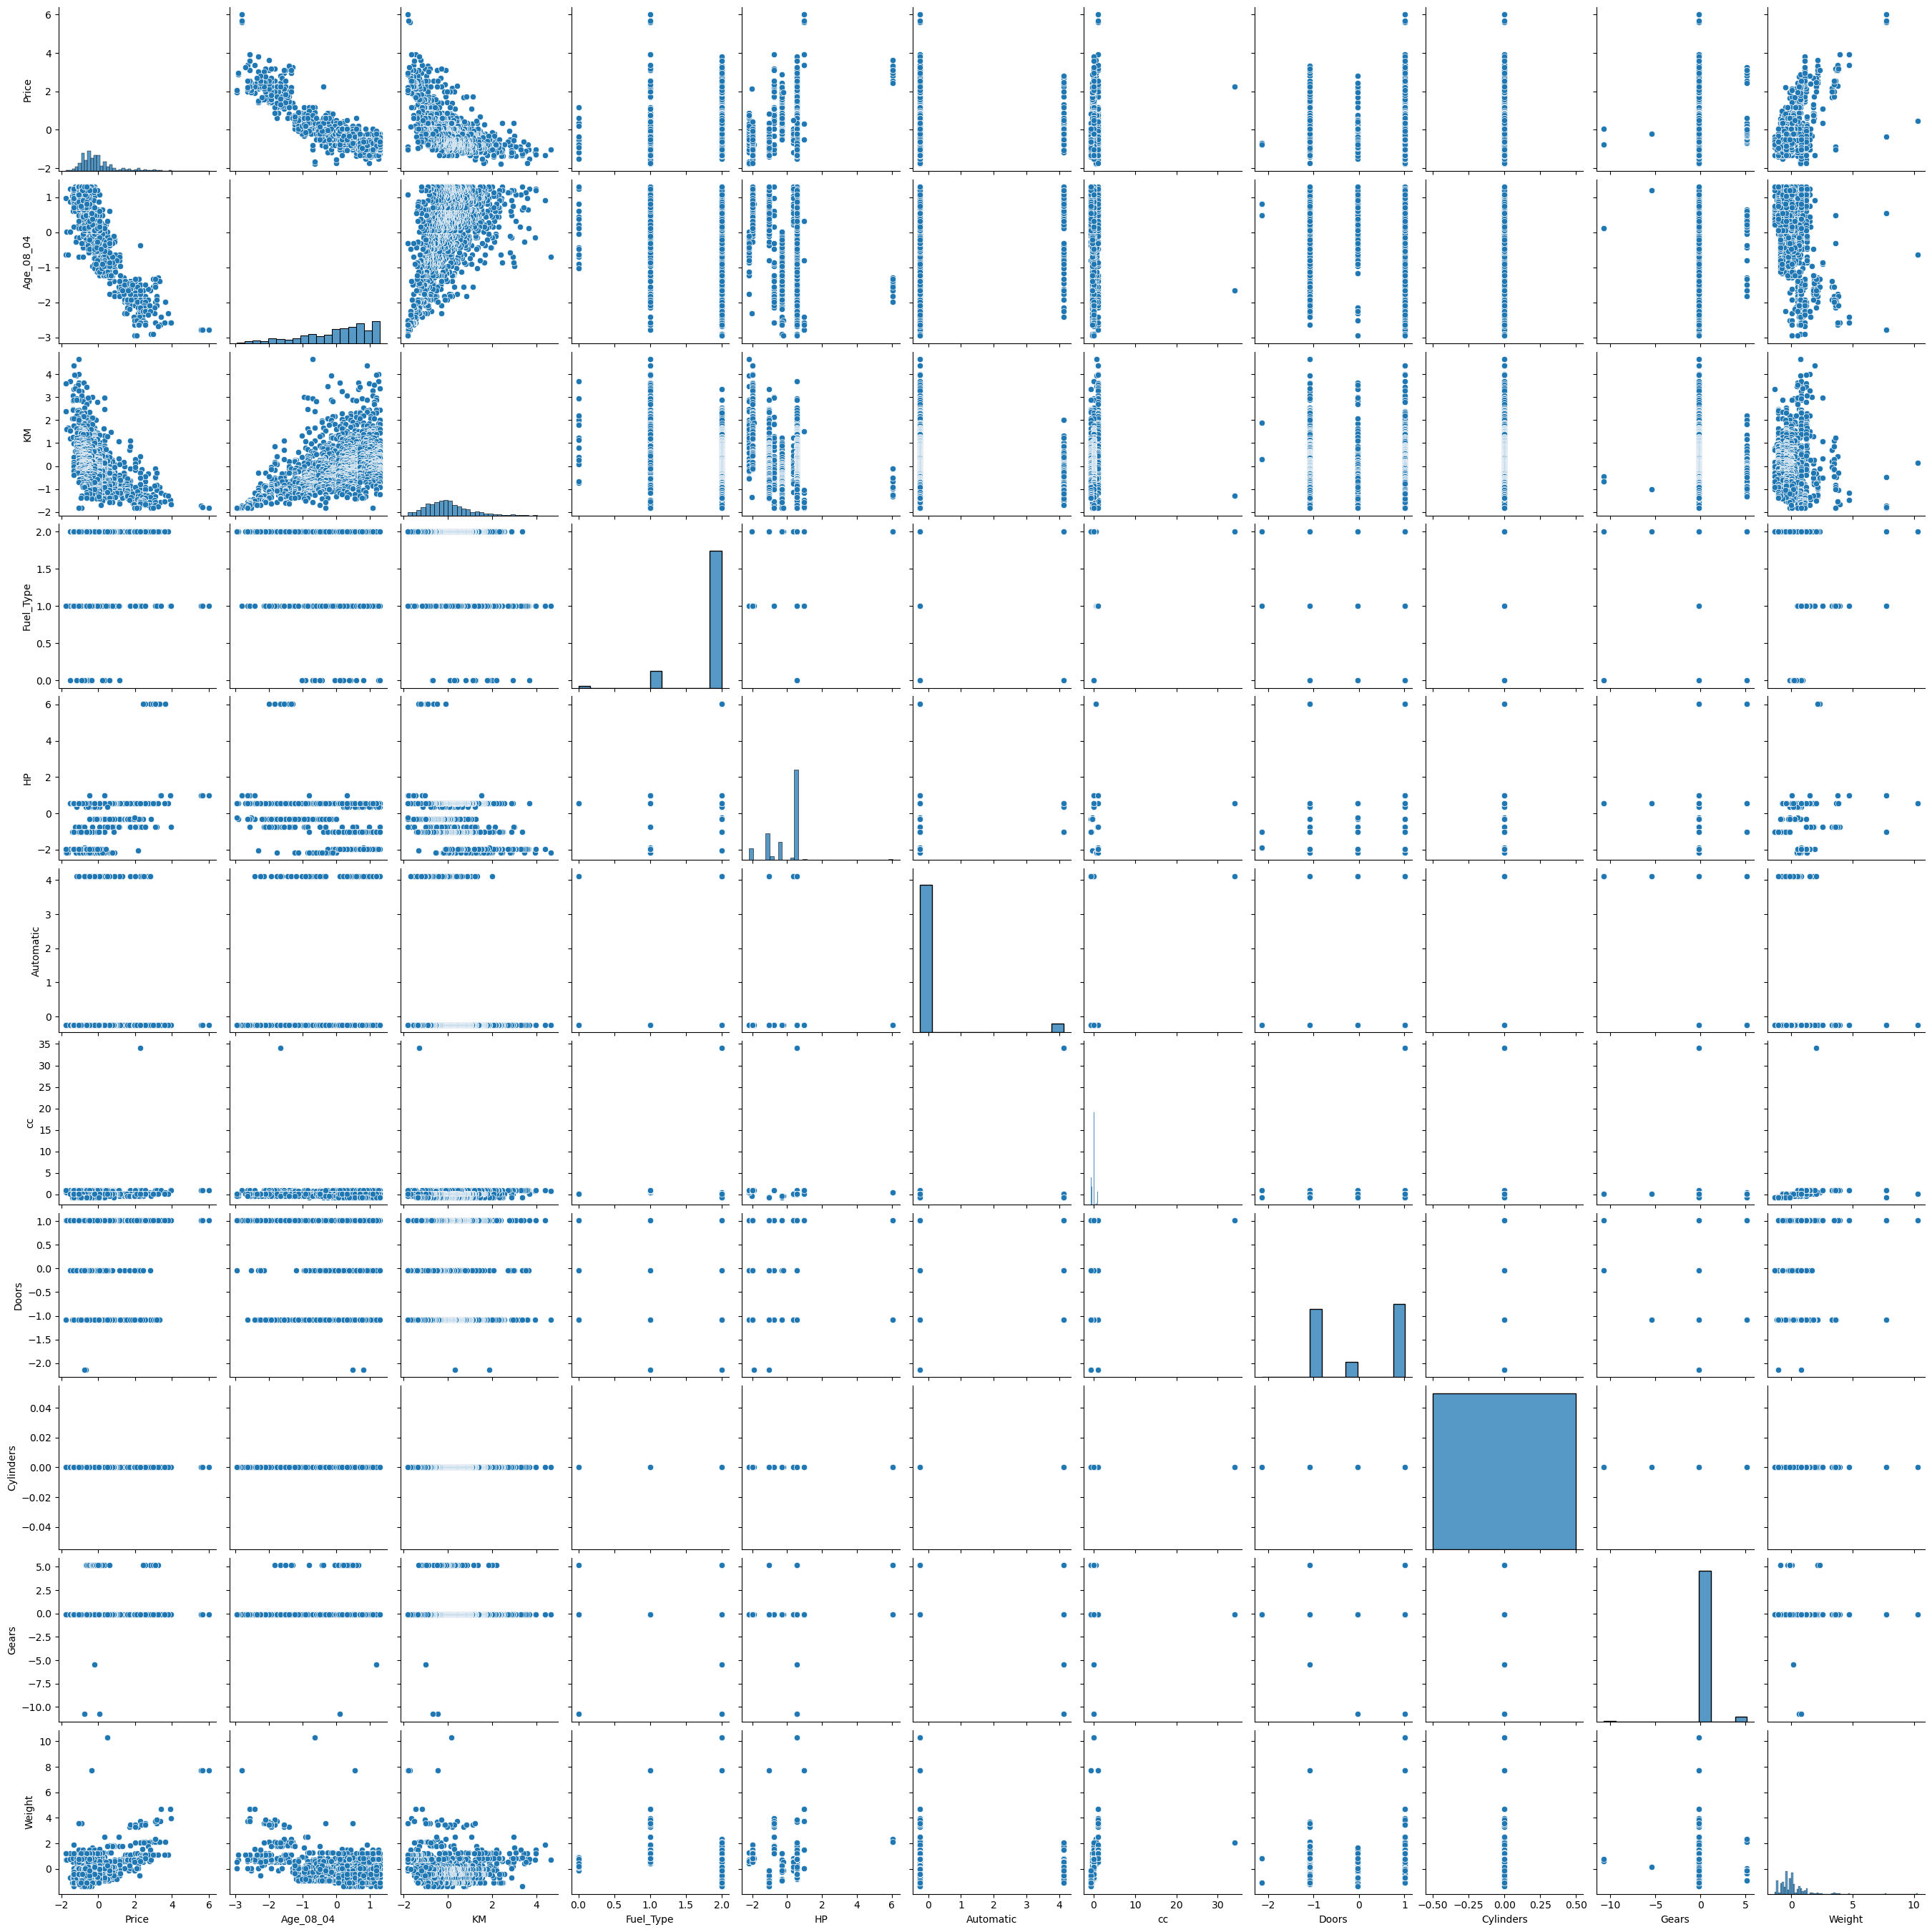

In [216]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Separate numerical and categorical columns
numerical_cols = ['Price','Age_08_04', 'KM', 'HP', 'Automatic','cc', 'Doors','Cylinders','Gears','Weight', ]
categorical_cols = ['Fuel_Type']
scaler = StandardScaler()
label_encoder = LabelEncoder()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan)
# Visualizations (example)
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [197]:
#data Partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


In [176]:
#finding the correlation between the variables
df.corr()



,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [ ]:
#Explaination with few of variables which combination gives more accuracy
Y_act=y
x1=X[['Weight']]
x2=X[['Weight','HP']]
x3=X[['Weight','HP','Doors']]
x4=X[['Weight','HP','Doors','cc']]



In [179]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
LR=LinearRegression()
LR.fit(x1,Y_act)
y_pred_1=LR.predict(x1)




In [141]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_act,y_pred_1)
print("mean square error of model-1:",mse.round(3))
print("root mean square error of model-1:",np.sqrt(mse.round(3)))
print("R-square of model-1:",r2_score(Y_act,y_pred_1).round(3))

mean square error of model-1: 0.662
root mean square error of model-1: 0.8136338242723197
R-square of model-1: 0.338


In [142]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x2,Y_act)
y_pred_2=LR.predict(x2)

In [143]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_act,y_pred_2)
print("mean square error of model-2:",mse.round(3))
print("root mean square error of model-2:",np.sqrt(mse.round(3)))
print("R-square of model-2:",r2_score(Y_act,y_pred_2).round(3))

mean square error of model-2: 0.593
root mean square error of model-2: 0.7700649323271382
R-square of model-2: 0.407


In [144]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x3,Y_act)
y_pred_3=LR.predict(x3)

In [145]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_act,y_pred_3)
print("mean square error of model-3:",mse.round(3))
print("root mean square error of model-3:",np.sqrt(mse.round(3)))
print("R-square of model-3:",r2_score(Y_act,y_pred_3).round(3))

mean square error of model-3: 0.592
root mean square error of model-3: 0.7694153624668538
R-square of model-3: 0.408


In [146]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x4,Y_act)
y_pred_4=LR.predict(x4)

In [147]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_act,y_pred_4)
print("mean square error of model-4:",mse.round(3))
print("root mean square error of model-4:",np.sqrt(mse.round(3)))
print("R-square of model-4:",r2_score(Y_act,y_pred_4).round(3))

mean square error of model-4: 0.587
root mean square error of model-4: 0.7661592523751182
R-square of model-4: 0.413


In [ ]:

'''Conculsion: Model-3 is best among all the models because it is having low root mean square error and high r-square value compared to other models.The variance between 
model-3 and model-4 is less.it is better to choose model wwith effective variables giving low root mean square error'''

In [219]:
 models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso())
]

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"--- {name} ---")
    print("Coefficients:", model.coef_)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R^2:", r2_score(y_test, y_pred))

--- Linear Regression ---
Coefficients: [-6.32654626e-01 -1.99981018e-01  1.08447266e-01  9.37198712e-02
  1.67049865e-02 -2.42867713e-03 -4.46233901e-03  9.71445147e-17
  2.50214374e-02  2.86325244e-01]
MSE: 0.14166550039910863
R^2: 0.8550404296173248
--- Ridge Regression ---
Coefficients: [-0.63195046 -0.20044239  0.10609719  0.0939727   0.01673337 -0.00243012
 -0.00428938  0.          0.02501428  0.28591805]
MSE: 0.1417436779462476
R^2: 0.8549604342506696
--- Lasso Regression ---
Coefficients: [-0. -0. -0.  0.  0.  0.  0.  0.  0.  0.]
MSE: 0.9774053283600479
R^2: -0.0001323970172597555


In [ ]:
'''Conclusion:
1)Linear Regression has relatively high R-squared value of 0.855 and MSE value of 0.141 is relatively low.
2)Ridge Regression has Similar performance to Linear Regression with slightly lower R-squared and higher MSE.
3)Lasso Regression has Extremely poor performance with an R-squared value close to zero and a high MSE.'''